In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42) 
print(X_train)

[[ 0.45267141 -1.42381257]
 [ 0.61696406 -0.00418956]
 [-0.60025705 -0.72979921]
 ...
 [ 0.63107723 -0.4743162 ]
 [-2.09387761 -1.76791586]
 [ 1.07909424 -1.67541279]]


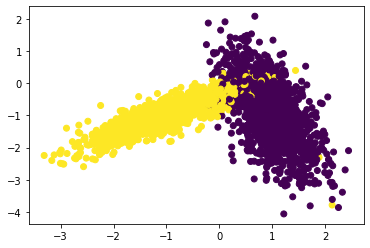

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

In [3]:
from sklearn.metrics import accuracy_score
import random 
from tqdm import tqdm

def random_params_range_1_to_len(params_range):
    sort_values = random.sample(range(1, params_range),10)
    sort_values.sort()
    return sort_values

def RandomSerachCV(x_train, y_train, classifier, params, folds):
    trainscores = []
    testscores  = [] 
    
    #Randomly selected numbers from params_range
    params_list= random_params_range_1_to_len(params_range)
    #printing the random paramter values
    print(params_list)
    
    params = {'n_neighbors': params_list}
    
    for k in tqdm(params['n_neighbors']):
        
        trainscores_folds = []
        testscores_folds  = []
        
        for j in range(0, folds): #fold = [1,2,3]
            #formulae for finding length
            Values = (len(x_train)/ (folds))
            #covert into integer values
            boundary = int(Values)
            
            
            test_indices=list(set(list(range((boundary*j), (boundary*(j+1))))))
            train_indices = list(set(list(range(0, len(x_train)))) - set(test_indices))
            # selecting the data points based on the train_indices and test_indices
            
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]

            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores,params

[3, 5, 19, 26, 27, 28, 30, 43, 44, 48]


100%|██████████| 10/10 [00:07<00:00,  1.29it/s]

{'n_neighbors': [3, 5, 19, 26, 27, 28, 30, 43, 44, 48]}
[0.9473333333333334, 0.9500000000000001, 0.9548, 0.9565333333333333, 0.956, 0.9558666666666666, 0.9549333333333333, 0.9571999999999999, 0.9573333333333333, 0.9568]
[0.9680666666666666, 0.9624666666666667, 0.9578666666666668, 0.9574666666666666, 0.9575999999999999, 0.9573333333333333, 0.9574666666666666, 0.9578000000000001, 0.9579333333333334, 0.9581333333333334]


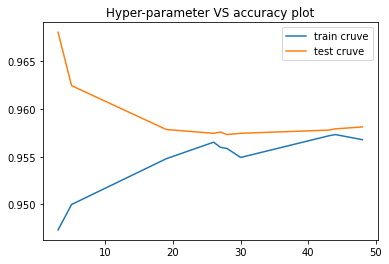

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")
neigh = KNeighborsClassifier()
params_range = 50
folds = 3
testscores, trainscores, params = RandomSerachCV(X_train, y_train, neigh, params_range, folds)
print(params)
print(trainscores)
print(testscores)
plt.plot(params['n_neighbors'],trainscores, label='train cruve')
plt.plot(params['n_neighbors'],testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [5]:
# taking it from reference 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

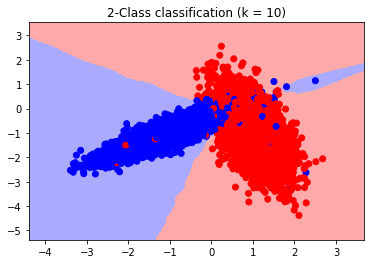

In [6]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 10)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

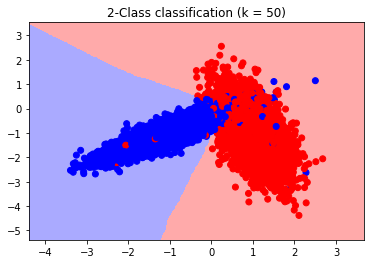

In [7]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 50)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)